In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# PCA로 Dimension Reduce 했을때, 차원의 수 n 선정 

In [28]:
x = pd.read_csv('./features_reduced_imputed.csv')
x.drop(['Unnamed: 0'], axis = 1, inplace = True)

y = pd.read_csv('./target.csv')
y = y['LET_IS']

In [29]:
li = ['AGE', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE'] #나머지 continues variable은 상관관계에서 drop된걸로 보임

for column in li:
    series = x[column]
    array = series.values
    array_reshaped = array.reshape(-1, 1)    
    #MinMaxScaler , StandardScaler
    scaler = MinMaxScaler()
    normalized_array = scaler.fit_transform(array_reshaped)
    normalized_array_1d = normalized_array.flatten()
    x[column] = normalized_array_1d

In [33]:
print(min(x['AGE']), max(x['AGE']))

x['K_BLOOD']
#use z-score : 26, 92 -> -3.191272946612637 2.6818887152087494

0.0 1.0


0       0.406780
1       0.203390
2       0.288136
3       0.271186
4       0.203390
          ...   
1695    0.237288
1696    0.389831
1697    0.332203
1698    0.135593
1699    0.264407
Name: K_BLOOD, Length: 1700, dtype: float64

0 :  0
1 :  0.27436672613663077
2 :  0.4847663469468083
3 :  0.6372737958195883
4 :  0.7451464742491585
5 :  0.773990356440233
6 :  0.7947649668017777
7 :  0.813320486019917
8 :  0.828026488275242
9 :  0.8416517482732899
10 :  0.8541037080926158
11 :  0.8655606141260455
12 :  0.8766213935514381
13 :  0.8869802570113974
14 :  0.896414976412884
15 :  0.9044819971172608
16 :  0.9117353983805467
17 :  0.9184058075414355
18 :  0.9245032418441902
19 :  0.9304384092557348
20 :  0.9358432870736866
21 :  0.9410116622173748
22 :  0.945640316134875
23 :  0.9496573696479237
24 :  0.9533136063715258
25 :  0.9565431177714785
26 :  0.9595949485741463
27 :  0.9623355140924613
28 :  0.9649598276443816
29 :  0.9675396379086549
30 :  0.9699436516547126
31 :  0.9718366820110806
32 :  0.9736371800225632
33 :  0.9752560473854706
34 :  0.9767731511628995
35 :  0.9782131620279518
36 :  0.9795032757200668
37 :  0.9807348745650355
38 :  0.9819011038040599
39 :  0.982920843784748
40 :  0.9838879830183327
41 :  0

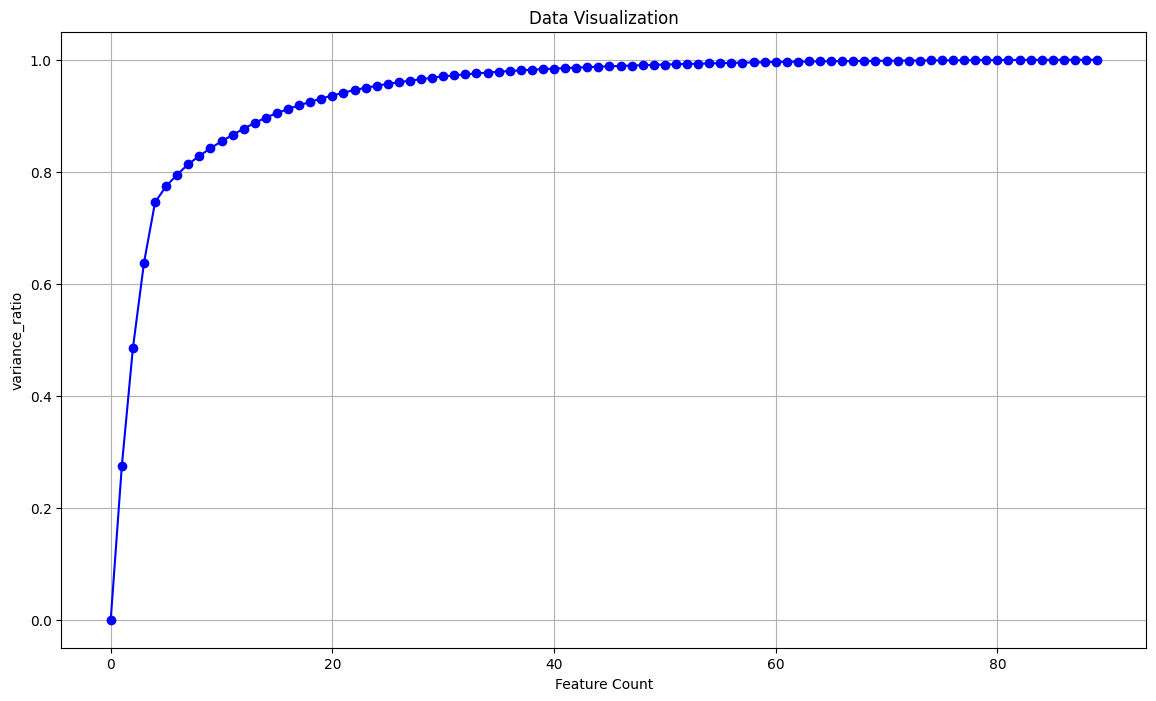

In [32]:
pca_li = [0]

for i in range(1, 90):
    pca = PCA(n_components = i)
    pca.fit(x)
    #print(f'Feature {i} : {pca.explained_variance_ratio_}')
    pca_li.append(sum(pca.explained_variance_ratio_))
   
#print(pca_li) 

for i in range(len(pca_li)):
    print(f"{i} : ", pca_li[i])
    
plt.figure(figsize=(14, 8))
plt.plot(pca_li, marker='o', linestyle='-', color='b')
plt.xlabel('Feature Count')
plt.ylabel('variance_ratio')
plt.title('Data Visualization')
plt.grid(True)
plt.show()
